# 여러 미분법과 다변수 함수의 도함수 : 변화율과 도함수를 복잡한 함수로 확장하기

In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

## 덧셈, 뺄셈, 곱셈, 나눗셈의 미분법

### 덧셈, 뺄셈의 미분법

- 거듭제급꼴, 지수함수, 로그함수들이 덧셈 또는 뺄셈으로 연결된 경우
- 주어진 함수의 입력에 대한 변화율은 각각의 함수의 변화율을 합해 놓은 것

### 곱셈의 미분법
- 각 함수를 미분해서 곱한 것으로 곱셈의 미분이 되지 않음
- 도함수의 정의를 사용하여 미분을 유도할 수 있음
- 전체 변화량이 한 함수의 변화량에 다른 함수가 곱해진 형태로 구성
- '앞 함수 미분 곱하기 뒤 함수 + 앞 함수 곱하기 뒤 함수 미분'

### 나눗셈의 미분법
- 도함수의 정의를 이용해 유도할 수 있음
- 곱셈의 미분법 유도 과정과 전체적으로 비슷

## 합성함수의 미분법
- 인공신경망은 결국 합성함수
- 신경망의 에러를 효율적으로 줄이기 위해서는 합성함수를 미분하는 과정 필요
- 함수가 복잡하면 도함수의 정의 또는 전개해서 미분하는 방식 적용 어려움
- 라이프니츠의 체인 룰 (chain rule)

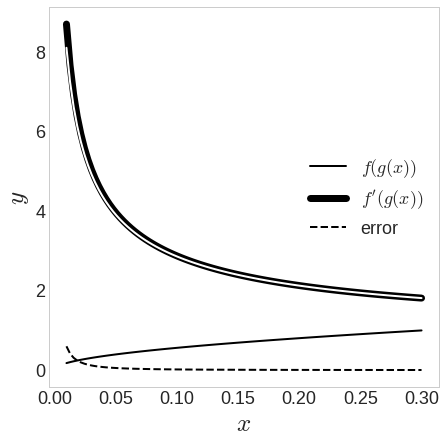

In [2]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

# 독립변수의 범위 설정
x = np.linspace(0.01, 0.3, 100)

# 독립변수에 변화를 줄 구간 크기 설정
h = 0.01

# g(x)에 해당하는 함수 정의
g  = lambda x : x**2 + 3*x
# g(x)의 변화율 정의
dg = lambda x : (g(x+h)-g(x)) / h

# f(x)에 해당하는 z = sqrt(y)와 그것의 변화율 정의
f  = lambda x : np.sqrt(x)
df = lambda x : (f(x+h)-f(x)) / h

# 원래 미분하고자 하는 함수를 직접 미분
dfg = lambda x : (2*x+3) / (2*np.sqrt(x**2+3*x))

plt.plot( x, f(g(x)), 'k', label=r"$f(g(x))$") 
plt.plot( x, dfg(x),  'k', label=r"$f'(g(x))$", lw=7) # 겹칩 확인 위해서 원래 도함수의 그래프 두껍게
plt.plot( x, df(g(x))*dg(x), c='white' ) # 합성된 함수에서 함수 f는 g(x)의 출력을 입력으로 받음

plt.plot( x, dfg(x)-df(g(x))*dg(x), '--', c='k', label="error")

plt.legend(loc="right", fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap5/fig5-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap5/fig5-2.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 아래쪽 가는 실선이 f(g(x))의 그래프
- 위쪽의 굵은 실선이 f'(g(x))
- 흰색 실선이 식 (5.4), 손으로 그린 그래프
- 대체로 잘 겹쳐져 있지만 0 부근에서 약간 어긋남
    - 식 (5.4)는 순간변화율이 아니기 때문에 오차가 생김
    
- 식(5.4)에 극한 취하기
    - delta y와 delta x의 관계 : delta y는 delta x에 의한 g(x)의 변화이므로
    - 좌, 우변 모두 도함수의 정의라는 것을 알 수 있음
    - 이 같은 미분규칙이 체인룰(chain rule, 연쇄법칙)
    
- 체인룰 이용하여 같은 실험 반복

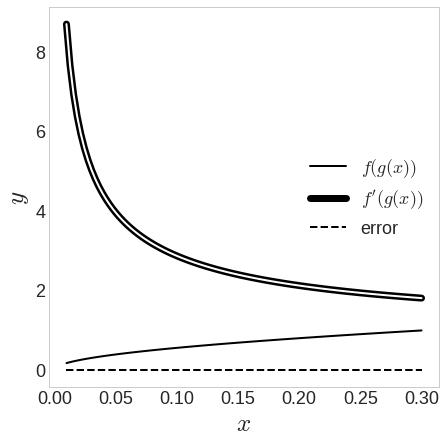

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

# 독립변수의 범위 설정
x = np.linspace(0.01, 0.3, 100)

# 독립변수에 변화를 줄 구간 크기 설정
h = 0.01

# g(x)에 해당하는 함수 정의
g  = lambda x : x**2 + 3*x
# g(x)의 변화율 정의 (도함수 정의 이용)
dg = lambda x : 2*x + 3

# f(x)에 해당하는 z = sqrt(y)와 그것의 변화율 정의
f  = lambda x : np.sqrt(x)
# 도함수 정의 이용
df = lambda x : 1/(2*np.sqrt(x))

# 원래 미분하고자 하는 함수를 직접 미분
dfg = lambda x : (2*x+3) / (2*np.sqrt(x**2+3*x))

plt.plot( x, f(g(x)), 'k', label=r"$f(g(x))$") 
plt.plot( x, dfg(x),  'k', label=r"$f'(g(x))$", lw=7) # 겹칩 확인 위해서 원래 도함수의 그래프 두껍게
plt.plot( x, df(g(x))*dg(x), c='white' ) # 합성된 함수에서 함수 f는 g(x)의 출력을 입력으로 받음

plt.plot( x, dfg(x)-df(g(x))*dg(x), '--', c='k', label="error")

plt.legend(loc="right", fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap5/fig5-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap5/fig5-2.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 에러가 사라짐

## 다변수 함수의 변화율
- 다변수 함수를 미분할 때는 편미분 개념 사용
- 다변수함수에서는 방향에따라 변화율이 모두 달라 순간변화율 정의할 수 없음

### 편도함수
- 변수의 변화를 제한하여 한 변수만 움직이게 하여 변화율 계산
- https://metamath1.github.io/noviceml/partial.html
- 편도함수를 구하는 것을 '편미분한다'라고 이야기함

### 야코비안
- 입력뿐 아니라 출력도 여러개인 함수
- 입력변수 n개, 출력이 하나인 함수에 대해서 편도함수 n개를 구할 수 있음
- 출력이 m개인 경우에는 입력변수 n과 m의 곱만큼 편도함수를 구할 수 있음 (n x m)
- 야코비안(Jacobian) : 편도함수를 블록형태로 적은 것 (m x n 형태)
    - 야코비 행렬의 행렬식을 야코비안이라고 하기도 함 (문맥이해 필요)
- 행렬을 벡터로 미분하거나 벡터를 행렬로 미분하는 것도 가능 (-> 9장)

## 자주 만나는 특별한 함수의 미분법

### 로지스틱 시그모이드 함수의 미분법
- 로지스틱 시그모이드 함수는 분수 꼴이므로 z에 대해 미분하기 위한 규칙은 나눗셈의 미분
